Text(0, 0.5, 'y (m)')

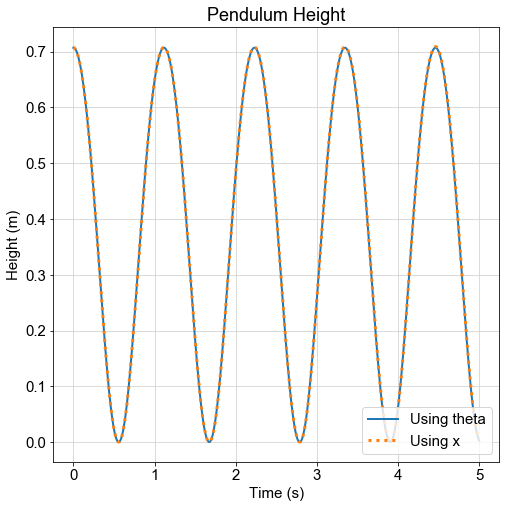

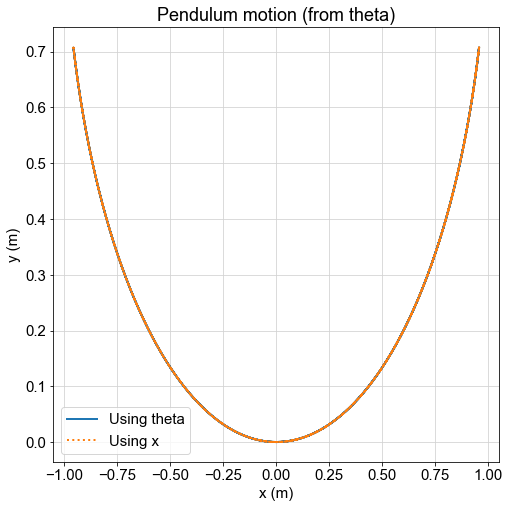

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
%matplotlib inline

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 15}

matplotlib.rc('font', **font)

#Initial conds and constants
l=1
g=9.81
m=1
y_0=-(1-1/np.sqrt(2))*l
theta_0=np.arcsin(y_0/l)  #by y=lsin(theta)

#EOMs from Hamiltonian
def theta_dot(p_theta):
    return p_theta/(m*l**2)
def p_theta_dot(theta):
    return -m*g*l*np.cos(theta)
    
theta_=[theta_0]
p_theta_=[0]

tstep=0.001 #time step in s
for t in np.arange(0,5,tstep):
    theta_.append(theta_[-1]+theta_dot(p_theta_[-1])*tstep)
    p_theta_.append(p_theta_[-1]+p_theta_dot(theta_[-1])*tstep)

figure(1,figsize=(8,8))
plt.plot(np.arange(0,5.0+tstep,tstep),l*np.sin(theta_)+l,label='Using theta',lw=2)
plt.title('Pendulum Height')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')

#Now using x
def x_dot(x,p_x):
    return p_x*(l**2-x**2)/(m*l**2)
def p_x_dot(x,p_x):
    return p_x**2*x/(m*l**2)-m*g*x/np.sqrt(l**2-x**2)

x_0=np.sqrt(l**2-y_0**2)
x_=[x_0]
p_x_=[0]

tstep=0.001 #time step in s
for t in np.arange(0,5.0,tstep):
    x_.append(x_[-1]+x_dot(x_[-1],p_x_[-1])*tstep)
    p_x_.append(p_x_[-1]+p_x_dot(x_[-1],p_x_[-1])*tstep)

y_from_x=[-np.sqrt(l**2-i**2)+l for i in x_]
figure(1,figsize=(8,8))
plt.plot(np.arange(0,5.0+tstep,tstep),y_from_x,label='Using x',ls=':',lw=3)
plt.grid(c='lightgray')
plt.legend(loc='lower right')

#Note perfect overlap :)

#Just for visuals (for myself)
figure(3,figsize=(8,8))
plt.plot(l*np.cos(theta_),l*np.sin(theta_)+l,label='Using theta',lw=2)
plt.plot(x_,y_from_x,label='Using x',ls=':',lw=2)
plt.grid(c='lightgray')
plt.legend()
plt.title('Pendulum motion (from theta)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')


